## Рассчет потенциальной нагрузки на преподавателей

#### Задачи 

1. Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

2. Построение line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков по количеству курсов.

3. Построение line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике для каждого курса

4. Рассчет количества прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Если выполнение домашнего задания перетекает из одного месяца в другой, такие дз включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз.

5. Построение line-graph для прогрессов выполнения домашних работ. 15 графиков по количеству курсов 

6. Построение line-graph для всех курсов по прогрессам выполнения домашних работ. 15 линий на графике по количеству курсов. 

7. Аналитический вывод на основании рассчитанных метрик

In [1]:
# Импорт библиотек и модулей
import pandas as pd
import datetime as DT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Чтение файлов
course_contents = pd.read_csv('course_contents.csv')
courses = pd.read_csv('courses.csv', index_col=0)
progress_phases = pd.read_csv('progress_phases.csv')
progresses = pd.read_csv('progresses.csv')
students = pd.read_csv('students.csv')

In [3]:
# Соединение датафреймов
df = progress_phases.merge(progresses.rename(columns={'id':'progress_id'}))
df = df.merge(courses.rename(columns={'id':'course_id', 'title':'course_title', 'field':'course_field'}))
df = df.merge(course_contents)

In [4]:
# Преобразования в датафрейме students и его присоединение к основному датасету
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')   
now = DT.datetime.now()
students['age'] = (now - students['birthday']).astype('timedelta64[Y]')

df_full = df.merge(students.rename(columns={'id':'student_id'}))
df_full.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,20469,Санкт-Петербург,1984-11-30,36.0
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,20469,Санкт-Петербург,1984-11-30,36.0
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,20469,Санкт-Петербург,1984-11-30,36.0
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,20469,Санкт-Петербург,1984-11-30,36.0
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,20469,Санкт-Петербург,1984-11-30,36.0


### 1. Рассчет месячного прироста студентов по курсам с 03.2016 по 07.2019

In [5]:
# Преобразуем столбы с датами в тип datetime
df_full['start_date'] = pd.to_datetime(df_full['start_date'])
df_full['finish_date'] = pd.to_datetime(df_full['finish_date'])

# Оставляем только те строки, в которых есть выполнение домашнего задания
df_first_hw = df_full[df_full['is_homework'] == True]

# Посмотрим, какому номеру модуля и урока соответствуют самые ранние даты
df_111 = df_first_hw.groupby('course_title')['start_date'].agg('min')
df_222 = df_first_hw.loc[df_first_hw['start_date'].isin(df_111)]
df_222

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age
2611,628e5253cbda1bccd3b4b7f77b9855a2,1,6,done,2018-06-20 14:51:26.828521+00:00,2018-06-29 15:52:09.354406+00:00,bbf7d50f59430c03a9d4b771850c4fb9,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,24658,Казань,1995-03-03,26.0
57858,8df0a95dd1ed72841b1a278a73b95b07,1,6,start,2018-07-06 10:57:05.419347+00:00,NaT,38648f174984905e282e3695323e8507,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,Вводный модуль,Домашняя работа,1eb308c8-9e05-4760-b8a9-64405055eb02,False,True,25925,Sochi,NaT,NaN
80027,3123f5286c2ce148912045b4c2ede18a,1,9,done,2018-06-23 12:48:36.707365+00:00,2018-06-29 16:55:36.661104+00:00,544eb03d949d24dcfee5e98f5e674560,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Введение и первый результат,Домашняя работа,d5a66366-cf9e-49b9-9a09-77a29706a142,False,True,23853,Москва,1981-08-09,39.0
89702,6f118b2a2dfdaed1dcc228ff05019a3c,1,3,done,2018-02-19 12:11:16.269120+00:00,2018-02-20 09:04:03.604390+00:00,243e2dae0c5885032ede9bad369d4651,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,29270,NaN,1987-04-22,34.0
104596,e3f9098d03e5ac22290e847ed05dcea7,1,7,done,2018-01-23 14:55:21+00:00,2018-01-26 07:09:17+00:00,8691abedab5f7efbe216d90190d53ba8,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True,17782,Санкт-Петербург,1994-07-08,26.0
187166,ccc4d33cca2c0ce087dd54cabc7f2a1e,1,8,done,2016-11-06 14:27:57+00:00,2016-11-09 21:36:17+00:00,43b6d2d1c874b489f4398fc0d5737c71,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,474607cc-0b1b-405d-b391-21bb3fca7bd2,False,True,115152,NaN,1996-09-16,24.0
210446,548e3022328c5bdef3fa6584fc0f132e,1,7,done,2018-03-05 20:48:17.876183+00:00,2018-03-21 10:39:56.483620+00:00,259e0f1d003af8b227b068be95ef1ff4,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True,21740,Barcelona,1989-08-18,31.0
258302,fd66f592001bd159efcbd014cf5ed608,1,2,done,2016-03-15 17:39:14+00:00,2016-03-15 18:30:22+00:00,44dd0d965e963e22c561ace77c7d6d19,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development,О программе,Домашняя работа,dffea62d-ab41-40c5-b465-62c2f9871ad8,False,True,103150,NaN,1995-06-20,25.0
258345,4bb0e827245856b474c55df73ce14eb0,3,2,done,2017-03-05 06:52:16+00:00,2017-06-30 13:53:43+00:00,4262169e11959b72a3841b6c80f88e65,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Базовые знания о типографике. Практика Photoshop,Домашняя работа,192daf24-2575-4420-a09d-0c6b7960bc6d,False,True,117584,NaN,1997-08-13,23.0
284010,9e916118a66c14b4be9208b486f7fd50,1,4,done,2017-05-02 19:49:02+00:00,2017-05-04 03:28:23+00:00,037ecd8428adfd805834693187b2aaa8,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business,Экологичный путь менеджера,Домашняя работа,8e0b5603-ecc4-46f0-9468-02df445089aa,False,True,120183,NaN,1991-07-13,29.0


In [6]:
# По выдаче понятно, что это уроки "Домашняя работа" в первом модуле для 14 курсов и в 3-м модуле 
# для курса "Веб-дизайн Базовый" - для этого курса пропишем условие отдельно

# Выберем соответствующие строки из датафрейма по условию
df_first_hw = df_first_hw[((df_first_hw['lesson_title'] == 'Домашняя работа')\
                           & (df_first_hw['module_number'] == 1))\
                          | ((df_first_hw['course_title'] == 'Веб-дизайн Базовый')\
                          & (df_first_hw['module_number'] == 3)\
                             & (df_first_hw['lesson_title'] == 'Домашняя работа'))]

# Добавим столбец с годом и месяцем
df_first_hw['year_month'] = df_first_hw['start_date'].dt.strftime('%Y-%m')
df_first_hw.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age,year_month
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2018-06
13,c90ebe1431eac5cbb11692100b7a0f8d,1,7,start,2018-06-19 18:40:00.576904+00:00,NaT,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2018-06
21,5767046d89ed7563a0c3a9a3896a23e6,1,3,done,2018-02-19 12:32:35.928905+00:00,2018-02-20 09:16:36.741375+00:00,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2018-02
29,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,41866,Санкт-Петербург,1993-03-05,28.0,2019-03
57,44a273daaf809b476238e77b13654f43,1,8,start,2018-12-23 13:06:16.135260+00:00,NaT,03151bc73bdb29fe1be1443c6d83e22f,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,Профессия дизайнера в эпоху цифровых перемен,Домашняя работа,474607cc-0b1b-405d-b391-21bb3fca7bd2,False,True,41866,Санкт-Петербург,1993-03-05,28.0,2018-12


In [7]:
# Рассчитаем ежемесячный прирост студентов по курсам
df_first_hw_gr = df_first_hw.groupby(['course_title', 'year_month'])[['student_id']].count()
df_first_hw_gr

student_id
course_title                  year_month            
Excel Базовый                 2018-02              6
                              2018-03              3
                              2018-05              3
                              2018-06              9
                              2018-07             13
...                                              ...
Руководитель digital-проектов 2019-03             36
                              2019-04             17
                              2019-05             25
                              2019-06             15
                              2019-07             20

[244 rows x 1 columns]

In [8]:
# Однако некоторые даты пропущены  - это исказит графики. Добавим эти даты со значением student_id 0

# Для добавления дат используем метод product из itertools. Однако для начала нам нужно создать список с курсами 
# и датами, вхождения которых попарно будем проверять в датасете

# Создаем список дат в цикле
list_dates = []
list_years = ['2016', '2017', '2018', '2019']
list_months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in list_years:
    for month in list_months:
        
        # Исключаем месяца в 2016 и 2019 годах, которые нам не нужны
        if year == '2016' and (month == '01' or month == '02'):
            continue
        if year == '2019' and (month == '08' or month == '09' or month == '10' or month == '11' or month == '12'):    
            continue

        # Формируем список с нужными датами в формате "год-месяц", как в датафрейме
        new_date = str(year + '-' + month)
        list_dates.append(new_date)
        
# Создаем список названий курсов
list_courses = []
for name, df_ in df_first_hw_gr.groupby('course_title'):
    list_courses.append(name)

In [9]:
# Импорт нужного модуля
import itertools

In [10]:
# Создаем список с парными элементами: название курса + дата
list_courses_dates = itertools.product(list_courses, list_dates)
list_courses_dates = list(list_courses_dates)

# Воспользуемся методом reindex(), чтобы добавить недостающие строки с датами
df_first_hw_gr = df_first_hw_gr.reindex(list_courses_dates, fill_value=0)
df_first_hw_gr.head(20)

student_id
course_title  year_month            
Excel Базовый 2016-03              0
              2016-04              0
              2016-05              0
              2016-06              0
              2016-07              0
              2016-08              0
              2016-09              0
              2016-10              0
              2016-11              0
              2016-12              0
              2017-01              0
              2017-02              0
              2017-03              0
              2017-04              0
              2017-05              0
              2017-06              0
              2017-07              0
              2017-08              0
              2017-09              0
              2017-10              0

### 2. Графики прироста студентов за указанный период по курсам

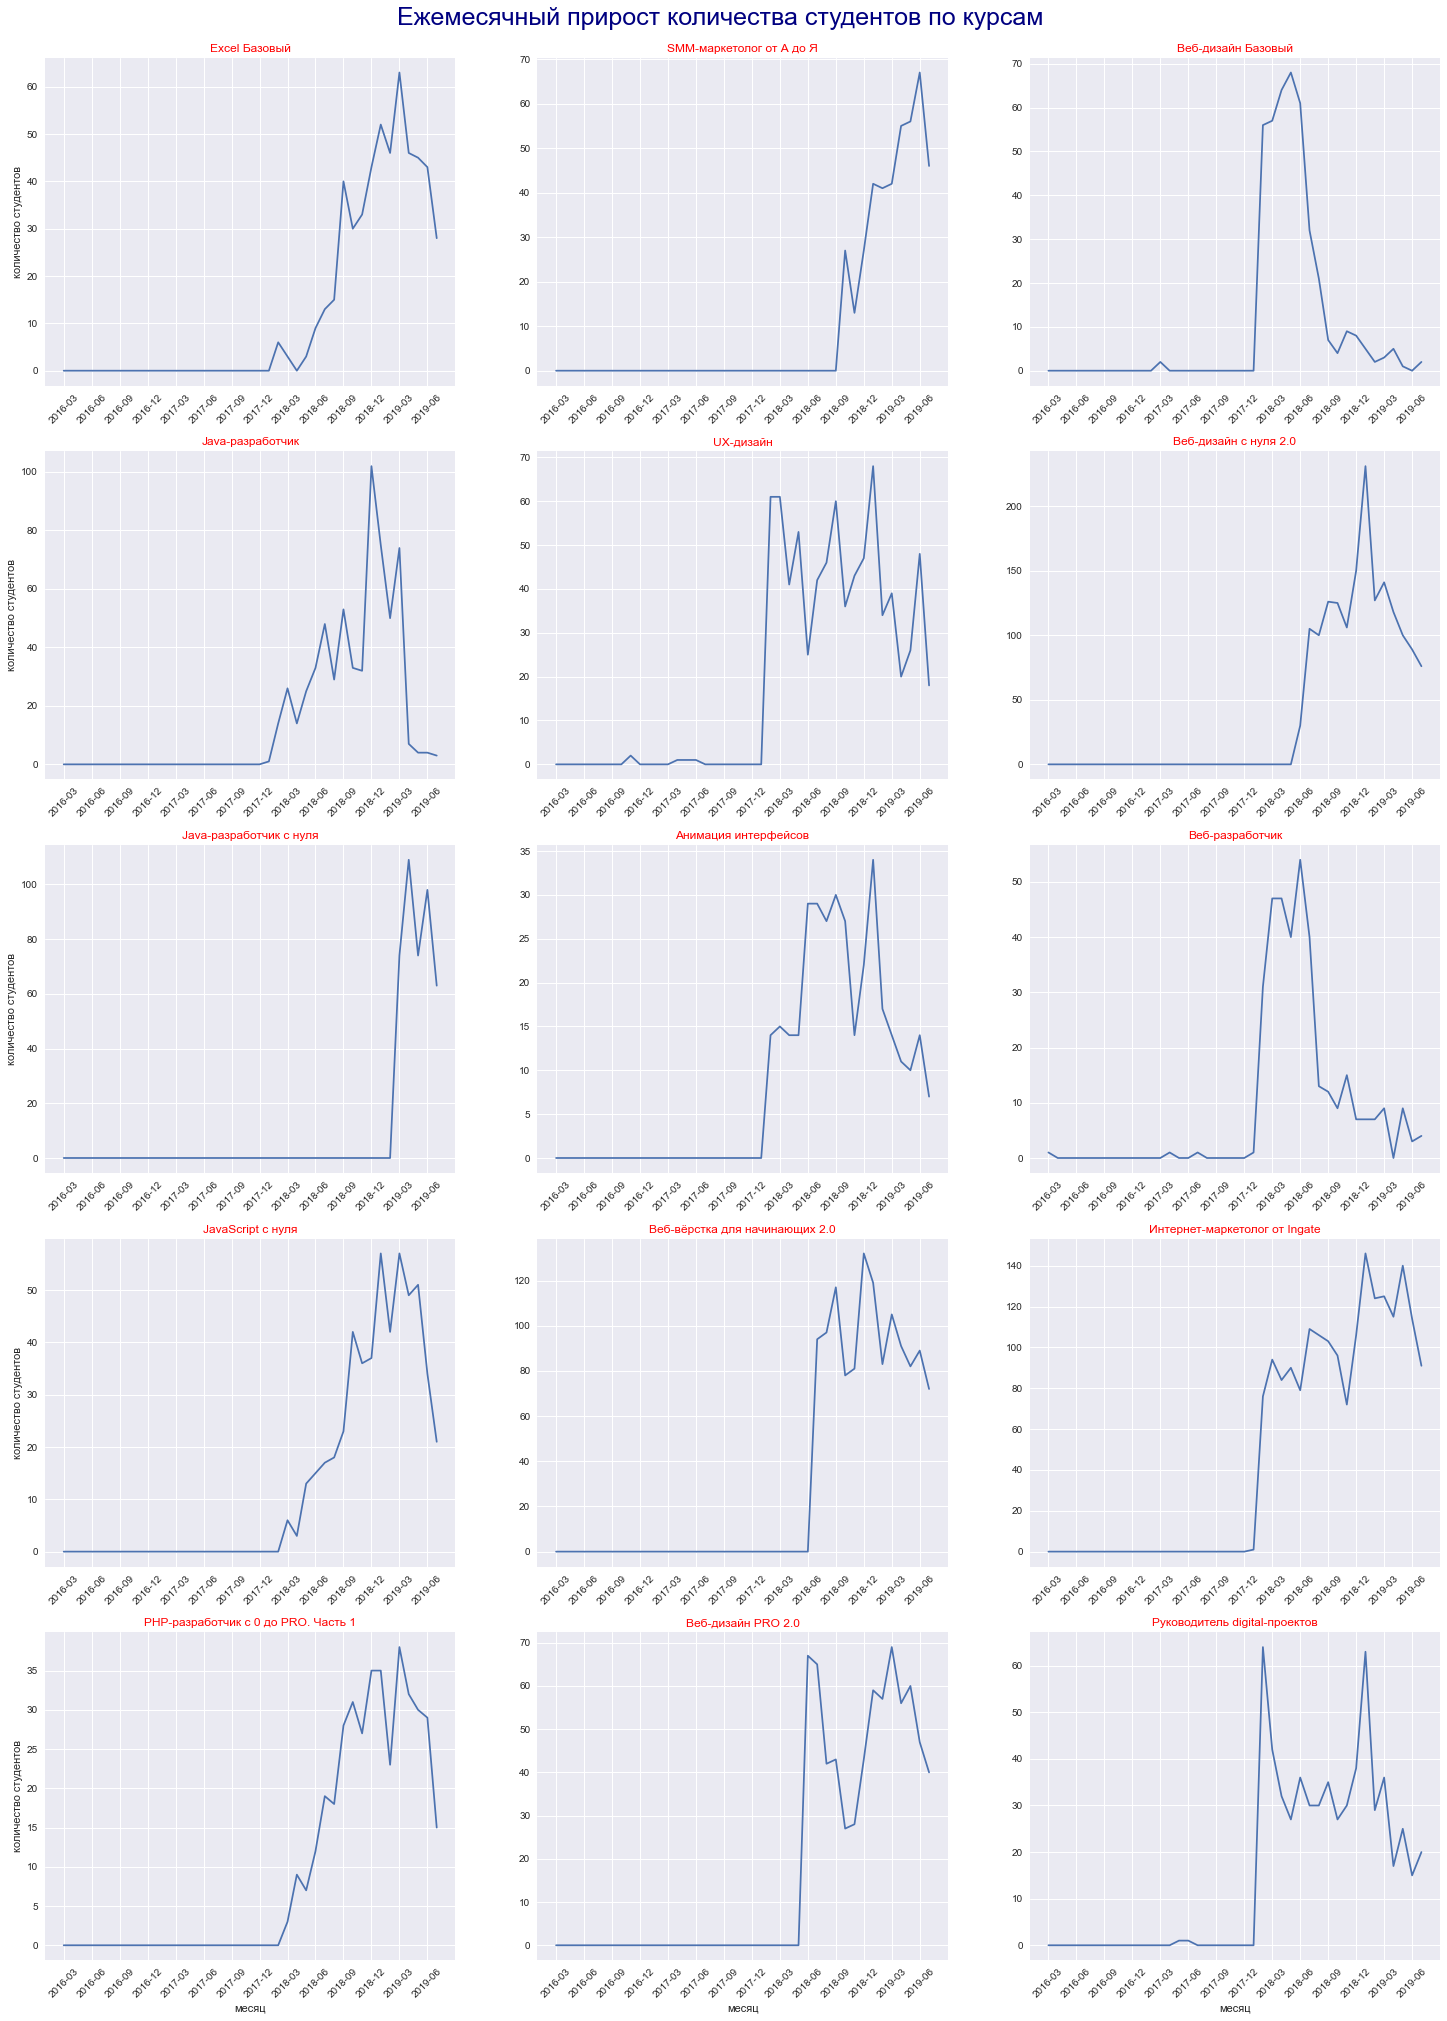

In [11]:
# Графики будем строить в цикле на сетке 5 на 3.
# Разобъем список курсов на три части для построения графиков на сетке    
list_courses1 = list_courses[:5]
list_courses2 = list_courses[5:10]
list_courses3 = list_courses[10:15]

# Зададим сетку графиков и ее размер
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(25,35))

# Подготовим данные, убрав мультииндекс для удобства построения графиков
first_hw = df_first_hw_gr.reset_index()

# Построим графики в трех циклах (по количеству столбцов)
# В цикле используем счетчик i для определения расположения графика по строкам и название курса для группировки

for i, name in enumerate(list_courses1):
    # Подготовим данные
    data = first_hw[first_hw['course_title'] == name]\
        .groupby('year_month')[['student_id']]\
        .first()
    
    # Определим расположение графика
    ax = axs[i][0]
    # Построим график и зададим параметры
    sns.lineplot(data=data, x='year_month', y='student_id', ax=ax)
    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('количество студентов')
    ax.set(xticks=list_dates[::3])

    if i == 4:
        ax.set_xlabel('месяц')
        
    
# аналогично два других цикла:
for i, name in enumerate(list_courses2):
    
    data = first_hw[first_hw['course_title'] == name]\
        .groupby('year_month')[['student_id']]\
        .first()
    
    ax = axs[i][1]
    sns.lineplot(data=data, x='year_month', y='student_id', ax=ax)

    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('')
    ax.set(xticks=list_dates[::3])
    
    if i == 4:
        ax.set_xlabel('месяц')


for i, name in enumerate(list_courses3):
    
    data = first_hw[first_hw['course_title'] == name]\
        .groupby('year_month')[['student_id']]\
        .first()
    
    ax = axs[i][2]
    sns.lineplot(data=data, x='year_month', y='student_id', ax=ax)
    
    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('')
    ax.set(xticks=list_dates[::3])
    
    if i == 4:
        ax.set_xlabel('месяц')
        
        
plt.suptitle('Ежемесячный прирост количества студентов по курсам', size=25, y=0.9, color='navy')
plt.show()

### 3. Графики прироста студентов по курсам (на одной сетке)

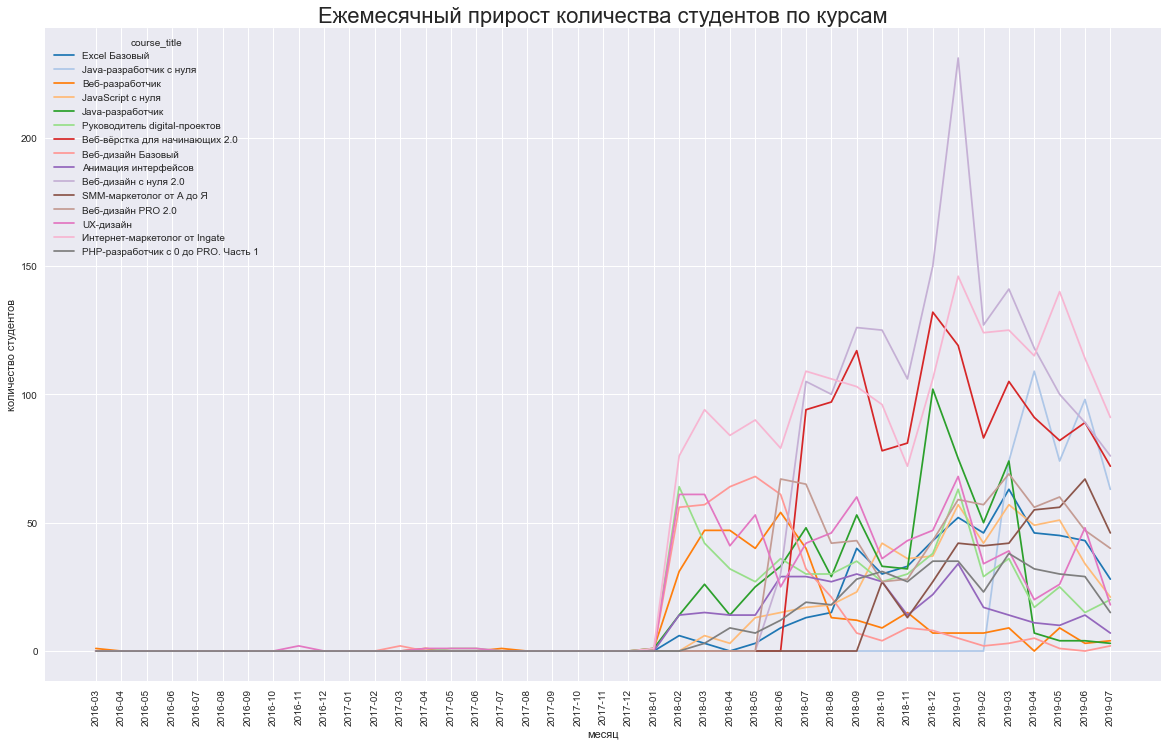

In [12]:
# Подготовим данные
data = first_hw.groupby(['course_title', 'year_month'])[['student_id']].first().sort_values(by='year_month')

# Зададим размер графику
fig, axs = plt.subplots(figsize=(20,12))

# Зададим цвета линий для категориальных данных
palette = sns.color_palette('tab20', 15)

# Построим графики
ax = sns.lineplot(data=data, x='year_month', y='student_id',hue='course_title', palette=palette)

# Зададим параметры для осей и название
ax.set_title('Ежемесячный прирост количества студентов по курсам', size=22)
ax.set_xlabel('месяц')
ax.set_ylabel('количество студентов')
ax.tick_params('x', rotation=90)

plt.show()

### 4. Рассчет количества прогрессов по домашним работам в каждом месяце для каждого курса (03.2016 - 07.2019)

In [13]:
# Оставим только те строки датафрейма, которым соответствует выполнение домашнего задания
df_hw = df_full[df_full['is_homework'] == True]

# Заполним пустые значения в столбце finish_date датой 2017-09-15 - то есть последним месяцем, присутствующим
# в датафрейме. Поскольку строки с NaN в этом столбце означают, что домашнее начато, но еще не сдано, значит к
# моменту выгрузки датасета (июль 2019) эти работы всё ещё в процессе выполнения. Это значит, что данные работы 
# следует учитывать во всех месяцах, что они находятся в процессе выполнения (начиная от start_date, заканчивая
# июлем 2019)
value = DT.datetime(2019,7,15,0,0,0)
df_hw['finish_date'] = df_hw['finish_date'].fillna(value)
df_hw['finish_date'] = pd.to_datetime(df_hw['finish_date'], utc=True)

# Поскольку выполнение некоторых домашних заданий занимает более одного месяца, для таких домашних необходимо 
# создать несколько новых строк в датафрейме - по количеству месяцев.
# Например, домашнее со стартом в марте и финишем в мае, должно быть в трех строках: март, апрель, май

# Сделаем это в несколько шагов.

# Первым шагом создадим новый столбец в датафрейме, куда запишем последний месяц выполнения для всех домашних
# (в дальнейшем будем вычитать по месяцу)
df_hw.loc[:, 'hw_date'] = df_hw['finish_date']

/Users/vladislav.terentyev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/vladislav.terentyev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/vladislav.terentyev/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:

In [14]:
# Следующим шагом будет создание нового датафрейма, в который соберем все домашние задания, выполнение которых
# заняло более одного месяца. Делать это будем в цикле

# Зададим итератор и пустой список для добавления
i = 0
df_hw2 = []


for first, second in zip(df_hw['start_date'], df_hw['finish_date']):
    
    # Сравниваем месяц и год старта и финиша. Если совпадают - не делаем ничего
    if first.year == second.year and first.month == second.month:
        pass
    
    # При несовпадении добавляем эту строку в заготовленный пустой список
    else:
        to_append = list(df_hw.iloc[i, :])
        df_hw2.append(to_append)
        
    i += 1

# Преобразуем список в новый датафрейм и задаем те же названия для столбцов    
df_hw2 = pd.DataFrame(df_hw2)
df_hw2.columns = df_hw.columns

# Сразу обновим столбец с датой домашнего задания в новом датафрейме - вычтем один месяц
df_hw2['hw_date'] = df_hw2['hw_date'] - pd.DateOffset(months=1)
df_hw2.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age,hw_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-06-15 00:00:00+00:00
1,c90ebe1431eac5cbb11692100b7a0f8d,1,7,start,2018-06-19 18:40:00.576904+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-06-15 00:00:00+00:00
2,5767046d89ed7563a0c3a9a3896a23e6,2,3,fail,2018-04-28 13:45:40.955076+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,12 принципов анимации от Walt Disney Studio,Домашняя работа,f6f37ada-7763-4a06-9e45-a42ca568e69a,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-06-15 00:00:00+00:00
3,3b9dce04f32da32763124602557f92a3,2,5,done,2019-03-18 14:54:51.001460+00:00,2019-05-11 10:37:06.769771+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,41866,Санкт-Петербург,1993-03-05,28.0,2019-04-11 10:37:06.769771+00:00
4,3b9dce04f32da32763124602557f92a3,5,4,done,2019-05-16 19:14:34.440042+00:00,2019-07-10 08:35:47.104702+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Портреты пользователей и CJM,Домашняя работа,dee39490-464b-496f-b0db-23347101cc13,False,True,41866,Санкт-Петербург,1993-03-05,28.0,2019-06-10 08:35:47.104702+00:00


In [15]:
# Следующим шагом будет построчно пройтись по получившемуся датафрейму и проверить каждую строку
# Если значение нового столбца и значение старта не совпадают, нужно создать новые строки по разнице этого 
# несовпадения, каждый раз указывая в новом столбце месяц на один меньше. Сделаем это в цикле

# Однако перед началом создадим для работы копию датафрейма, чтобы не вносились изменения в исходный
df_hw2_copy = df_hw2.copy()

# Создаем пустой список для записи строк
df_hw3 = []

for index, row in df_hw2.iterrows():
    difference = (df_hw2['hw_date'] - df_hw2['start_date']).astype('timedelta64[M]')
    difference = difference.astype('int64')
    
    # Если дата в новом столбце совпадает со стартом, с такой строкой уже работать не нужно
    if difference[index] == 0:
        pass
    
    # При несовпадении
    else: 
    
        new_row = row
        
        for i in range(difference[index]):
            
            new_row['hw_date'] = new_row['hw_date'] - pd.DateOffset(months=1)
            
            to_append = list(new_row)
            df_hw3.append(to_append)
            
# Преобразуем получившийся список в датафрейм и задаем названия столбцов            
df_hw3 = pd.DataFrame(df_hw3)
df_hw3.columns = df_hw.columns

In [16]:
# Наконец, собираем вместе три датафрейма: df_hw, df_hw2_copy, df_hw3
df_hw_final = pd.concat([df_hw, df_hw2_copy, df_hw3])
df_hw_final.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id_,city,birthday,age,hw_date
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2018-06-28 15:59:25.320418+00:00
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-07-15 00:00:00+00:00
13,c90ebe1431eac5cbb11692100b7a0f8d,1,7,start,2018-06-19 18:40:00.576904+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-07-15 00:00:00+00:00
21,5767046d89ed7563a0c3a9a3896a23e6,1,3,done,2018-02-19 12:32:35.928905+00:00,2018-02-20 09:16:36.741375+00:00,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2018-02-20 09:16:36.741375+00:00
23,5767046d89ed7563a0c3a9a3896a23e6,2,3,fail,2018-04-28 13:45:40.955076+00:00,2019-07-15 00:00:00+00:00,768c2987a744c51ce64a5993a2a94eaf,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,Design,12 принципов анимации от Walt Disney Studio,Домашняя работа,f6f37ada-7763-4a06-9e45-a42ca568e69a,False,True,20469,Санкт-Петербург,1984-11-30,36.0,2019-07-15 00:00:00+00:00


In [17]:
# Для удобства работы преобразуем новый столбец по домашних в формат год-месяц
df_hw_final['hw_date_new'] = df_hw_final['hw_date'].dt.strftime('%Y-%m')

# Сгруппируем по курсам и датам
hw_progress = df_hw_final.groupby(['course_title', 'hw_date_new'])[['student_id']].count()
hw_progress

student_id
course_title                  hw_date_new            
Excel Базовый                 2018-02              34
                              2018-03               8
                              2018-04              15
                              2018-05              21
                              2018-06              40
...                                               ...
Руководитель digital-проектов 2019-03             670
                              2019-04             620
                              2019-05             639
                              2019-06             643
                              2019-07             645

[258 rows x 1 columns]

### 5. Визуализация прогрессов выполнения домашних работ (15 графиков по количеству курсов)

In [18]:
# Перед тем, как строить графики, необходимо дополнить последний датафрейм, так как за некоторые данные отсутствуют
# выполнения домашних. Добавим эти строки со значениями 0, вновь обратившись к методу reindex()
hw_progress_gr = hw_progress.reindex(list_courses_dates, fill_value=0)
hw_progress_gr.head()

student_id
course_title  hw_date_new            
Excel Базовый 2016-03               0
              2016-04               0
              2016-05               0
              2016-06               0
              2016-07               0

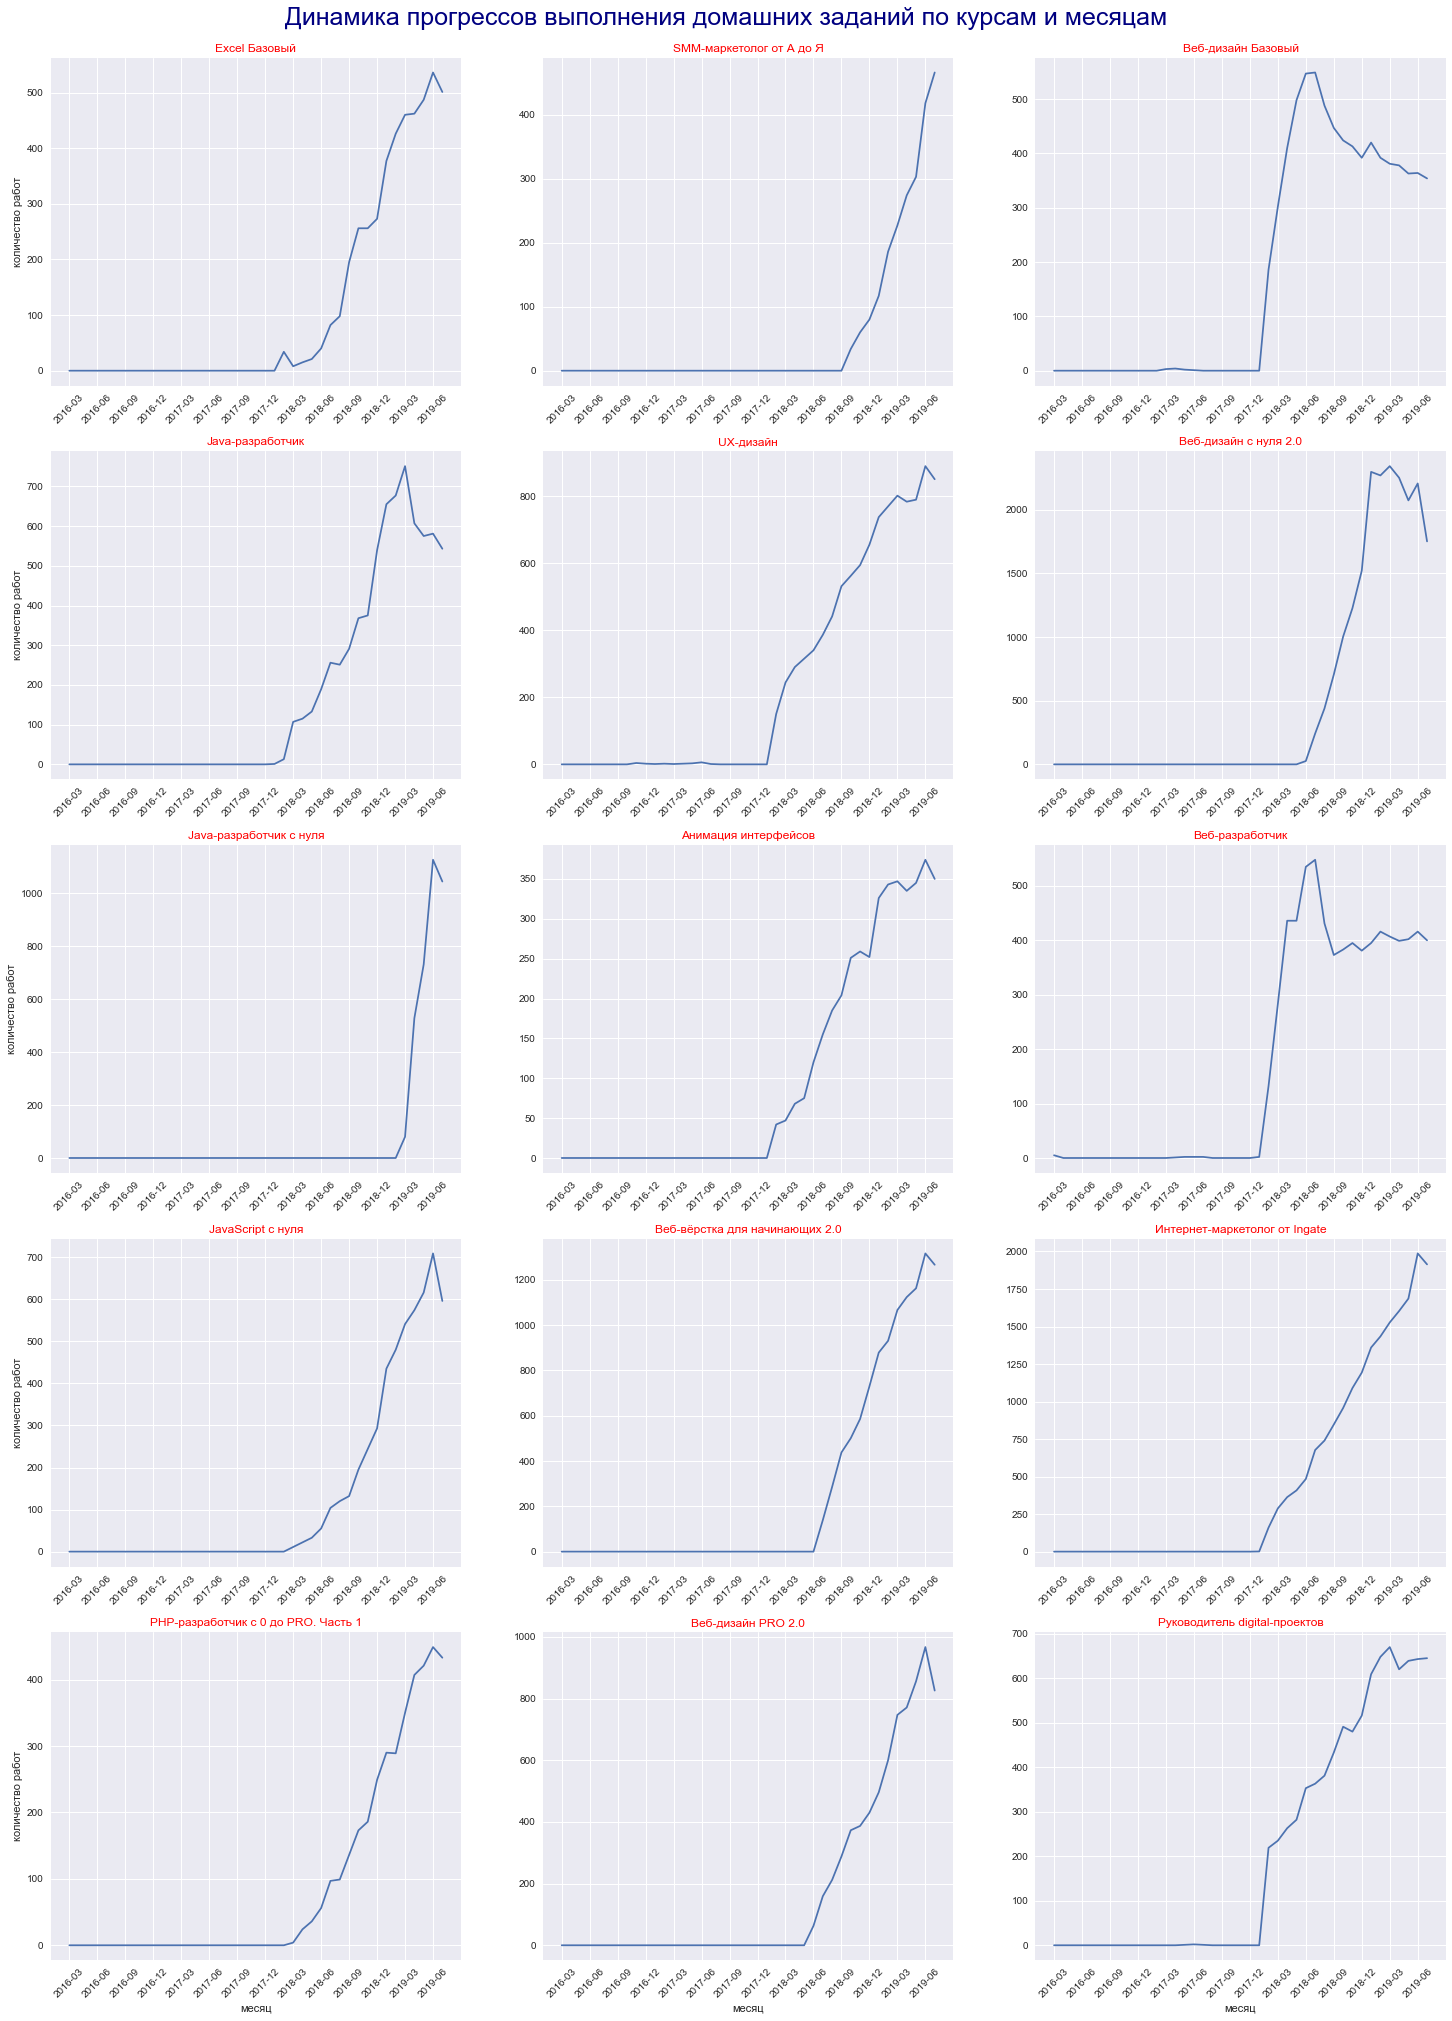

In [19]:
# Зададим сетку графиков и ее размер
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(25,35))

# Подготовим данные, убрав мультииндекс для удобства построения графиков
hw_progress2 = hw_progress_gr.reset_index()

# Построим графики в трех циклах (по количеству столбцов)
# В цикле используем счетчик i для определения расположения графика по строкам и название курса для группировки

for i, name in enumerate(list_courses1):
    # Подготовим данные
    data = hw_progress2[hw_progress2['course_title'] == name]\
        .groupby('hw_date_new')[['student_id']]\
        .first()
    
    # Определим расположение графика
    ax = axs[i][0]
    # Построим график и зададим параметры
    sns.lineplot(data=data, x='hw_date_new', y='student_id', ax=ax)
    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('количество работ')
    ax.set(xticks=list_dates[::3])

    if i == 4:
        ax.set_xlabel('месяц')
        
    
# аналогично два других цикла:
for i, name in enumerate(list_courses2):
    
    data = hw_progress2[hw_progress2['course_title'] == name]\
        .groupby('hw_date_new')[['student_id']]\
        .first()
    
    ax = axs[i][1]
    sns.lineplot(data=data, x='hw_date_new', y='student_id', ax=ax)

    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('')
    ax.set(xticks=list_dates[::3])
    
    if i == 4:
        ax.set_xlabel('месяц')


for i, name in enumerate(list_courses3):
    
    data = hw_progress2[hw_progress2['course_title'] == name]\
        .groupby('hw_date_new')[['student_id']]\
        .first()
    
    ax = axs[i][2]
    sns.lineplot(data=data, x='hw_date_new', y='student_id', ax=ax)
    
    ax.set_title(name, color='red')
    ax.set_xlabel('')
    ax.tick_params('x', rotation=45)
    ax.set_ylabel('')
    ax.set(xticks=list_dates[::3])
    
    if i == 4:
        ax.set_xlabel('месяц')
        
# Название        
plt.suptitle('Динамика прогрессов выполнения домашних заданий по курсам и месяцам', size=25, y=0.9, color='navy')
plt.show()

### 6. Визуализация прогрессов выполнения домашних работ (график с 15 линиями по количеству курсов)

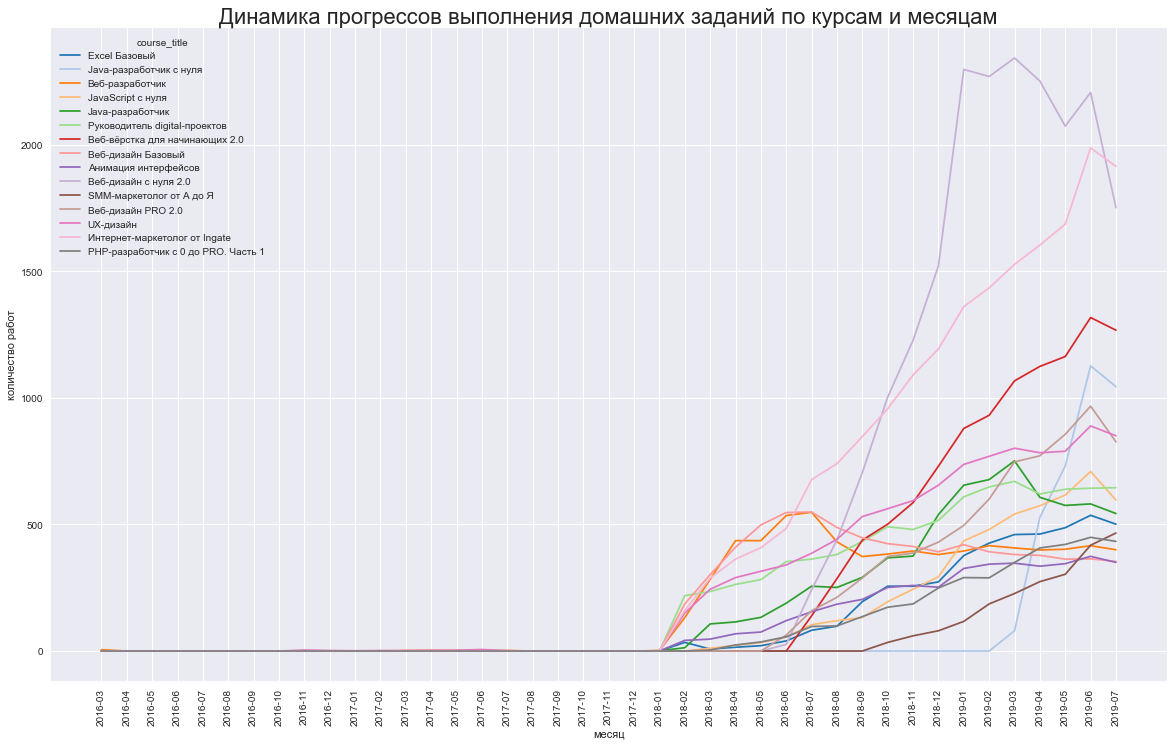

In [20]:
# Подготовим данные
data = hw_progress2.groupby(['course_title', 'hw_date_new'])[['student_id']].first().sort_values(by='hw_date_new')

# Зададим размер графику
fig, axs = plt.subplots(figsize=(20,12))

# Зададим цвета линий для категориальных данных
palette = sns.color_palette('tab20', 15)

# Построим графики
ax = sns.lineplot(data=data, x='hw_date_new', y='student_id',hue='course_title', palette=palette)

# Зададим различные параметры
ax.set_title('Динамика прогрессов выполнения домашних заданий по курсам и месяцам', size=22)
ax.set_xlabel('месяц')
ax.set_ylabel('количество работ')
ax.tick_params('x', rotation=90)

plt.show()

### 7. Основные выводы по разделу

Наблюдается сильная связь между приростом студентов и количеством выполняемых домашних работ и, следовательно, нагрузкой на преподавателей, что достаточно очевидно.

Как в случае прироста студентов, так и в случае прогресса выполнения домашних заданий явно наблюдается два периода: первый - до января 2018 года, второй - после. Начиная с этой даты наблюдается резкий рост количества студентов и, следовательно, выполнения домашних заданий. Возможно, в это время был внедрен новый подход к маркетинговому продвижению курсов.

При этом, момент начала "бума" для разных курсов может отличаться. Так, если большинство курсов испытали этот "бум" в январе 2018 года, прирост учащихся на некоторые другие случился позже. Так, это такие курсы, как Веб-дизайн PRO 2.0 (май 2018), Веб-вёрстка (июнь 2018), Веб-дизайн с нуля (июнь 2018), SMM-маркетолог (сентябрь 2018), Java-разработчик с нуля (январь 2019).

Наибольший прирост студентов и рост нагрузки на преподавателей - на курсе Веб-дизайн с нуля 2.0 и Интернет-маркетолог от Ingate, а наименьший - SMM-маркетолог.

Также стоит отметить отличие в динамике прироста студентов и прогресса выполнения домашних работ. Если прирост студентов держится относительно на стабильном уровне (если не считать ежемесячных колебаний вверх-вниз) в течение 2018 и 2019 годов, то в выполнение домашних работ наблюдается стабильный рост в этот же период. Это может объясняться тем, что выполнение домашних имеет кумулятивный эффект: то есть при длительном невыполнении домашнего задания оно считается в течение всех месяцев, когда это домашнее находится в "подвешенном" состоянии. Также информация о прогрессах в выполнении домашних работ может искажать наше представление о количестве тех студентов, которые решили бросить тот или иной курс.

В приросте студентов и в выполнении домашних работ наблюдается некоторый спад в последние месяцы (июнь-июль 2019). Возможно, это связано с сезонным фактором, так как летние месяцы - традиционно время отпусков и каникул.